In [2]:
# ###################################
# Group ID: 222
# Members: Adrián Gómez Repollés, Kresten Johansen, Misbah Unnisa, Mohammadali Zakeriharandi
# Date: 22/03/2024
# Lecture: Lecture 11: Graphic models
# Dependencies: numpy, scikit-learn, Matplotlib, seaborn
# Python version: 3.10.13
# Functionality: Jupyter notebook to train various decision tree models on California housing dataset
# ###################################

In [1]:
%reload_ext watermark
%watermark -v -p numpy,scikit-learn,matplotlib,seaborn

Author: Mohammadali Zakeriharandi

Python implementation: CPython
Python version       : 3.10.13
IPython version      : 8.15.0

numpy       : 1.21.5
scikit-learn: 1.1.1
matplotlib  : 3.5.2
seaborn     : 0.11.2



In [3]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.dummy import DummyClassifier, DummyRegressor
from sklearn.metrics import accuracy_score, mean_squared_error, confusion_matrix, ConfusionMatrixDisplay

## Load Data

In [4]:
dataset = fetch_california_housing()
data, targets = dataset.data, dataset.target

print(data.shape, targets.shape)

(20640, 8) (20640,)


In [5]:
# Split data
data_tr, data_ts, targets_tr, targets_ts = train_test_split(data, targets, test_size=0.2, random_state=42)
print("Training data:", data_tr.shape, targets_tr.shape)
print("Test data:", data_ts.shape, targets_ts.shape)

Training data: (16512, 8) (16512,)
Test data: (4128, 8) (4128,)


## Classification

In [6]:
def visualize_class_distribution(y, title, ax):
    vals, cnts = np.unique(y, return_counts=True)
    print("labels:", vals, "| counts:", cnts)

    sns.set_style("whitegrid")
    ax.bar(x=vals, height=cnts)
    ax.set_xticks(range(2))
    ax.set_xticklabels(["Low Price", "High Price"])
    ax.set_ylabel("Count")
    ax.set_title(title)

def visualize_performance(acc_trs, acc_vals, ylabel="Accuracy"):
    sns.set_style("whitegrid")
    fig, ax = plt.subplots()
    ax.plot(acc_trs, ".--", alpha=0.7, label="Training")
    ax.plot(acc_vals, ".--", alpha=0.7, label="Validation")
    ax.set_xlabel("Training Iteration")
    ax.set_ylabel(ylabel)
    ax.set_title("Model Performance")
    ax.legend()
    
    return fig

In [7]:
# Generate labels
thrs = np.mean(targets_tr)  # threshold by looking into training dataset
y_tr = np.zeros_like(targets_tr)
y_tr[targets_tr > thrs] = 1  # 0=low, 1=high
y_ts = np.zeros_like(targets_ts)
y_ts[targets_ts > thrs] = 1 


labels: [0. 1.] | counts: [9794 6718]
labels: [0. 1.] | counts: [2477 1651]


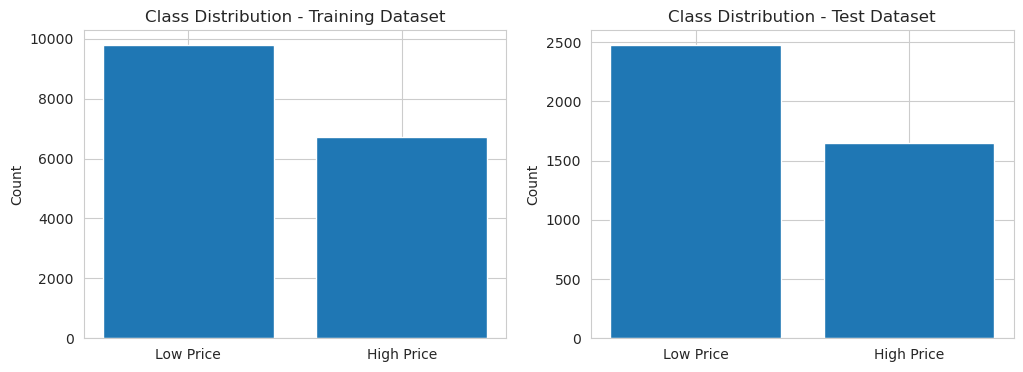

In [9]:
# Visualize class distribution
fig, axs = plt.subplots(1, 2, figsize=(12, 4))
_ = visualize_class_distribution(y_tr, title="Class Distribution - Training Dataset", ax=axs[0])
_ = visualize_class_distribution(y_ts, title="Class Distribution - Test Dataset", ax=axs[1])



Training with criterion=gini and max_depth=10 ...
Training with criterion=gini and max_depth=60 ...
Training with criterion=gini and max_depth=110 ...
Training with criterion=gini and max_depth=160 ...
Training with criterion=gini and max_depth=210 ...
Training with criterion=gini and max_depth=260 ...
Training with criterion=gini and max_depth=310 ...
Training with criterion=gini and max_depth=360 ...
Training with criterion=gini and max_depth=410 ...
Training with criterion=gini and max_depth=460 ...
Training with criterion=gini and max_depth=None ...


Training with criterion=entropy and max_depth=10 ...
Training with criterion=entropy and max_depth=60 ...
Training with criterion=entropy and max_depth=110 ...
Training with criterion=entropy and max_depth=160 ...
Training with criterion=entropy and max_depth=210 ...
Training with criterion=entropy and max_depth=260 ...
Training with criterion=entropy and max_depth=310 ...
Training with criterion=entropy and max_depth=360 ...
Traini

'Best model:'

DecisionTreeClassifier(criterion='entropy', max_depth=160)

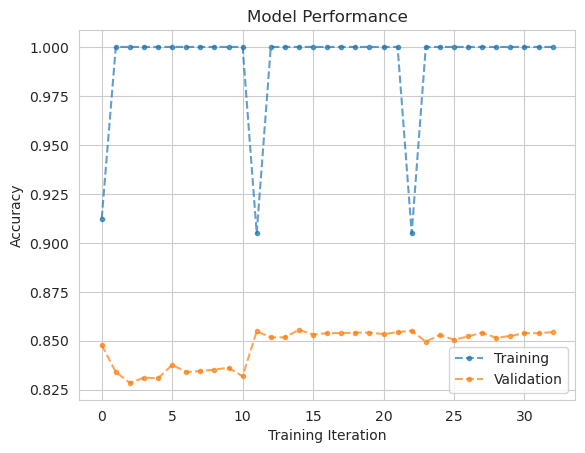

In [10]:
# Training models 
X_tr, X_ts = data_tr, data_ts

criteria = ["gini", "entropy", "log_loss"]
depth_vals = [*np.arange(10, 500, 50), None]
params_best = []
acc_best = 0
model_best = DummyClassifier()
acc_trs, acc_vals = [], []

for criterion in criteria:
    print("\n")
    for depth in depth_vals:
        print(f"Training with criterion={criterion} and max_depth={depth} ...")
        
        # Train
        model = DecisionTreeClassifier(criterion=criterion, max_depth=depth) 
        model.fit(X_tr, y_tr)
        
        # Log performance
        acc_trs.append(accuracy_score(y_tr, model.predict(X_tr)))
        acc_vals.append(accuracy_score(y_ts, model.predict(X_ts)))

        # Track best parameters
        if acc_vals[-1] > acc_best:
            params_best = [criterion, depth]
            acc_best = acc_vals[-1]
            model_best = model

print("\nBest parameters:", params_best)
print("Best accuracy:", acc_best)
display("Best model:", model_best)
_ = visualize_performance(acc_trs, acc_vals)

It is observed that: 
- Changing the model parameters `criterion` and `max_depth` affects the performance of the model in terms of validation accuracy
- We can see that `criterion="entropy"` and  `max_depth=160` result in the best validation peformance, eaching an accuracy around 85% for the test dataset. 

The next step is to check the confusion matrix of the best obtained model. 

Text(0.5, 0.98, "Best Model's Performance")

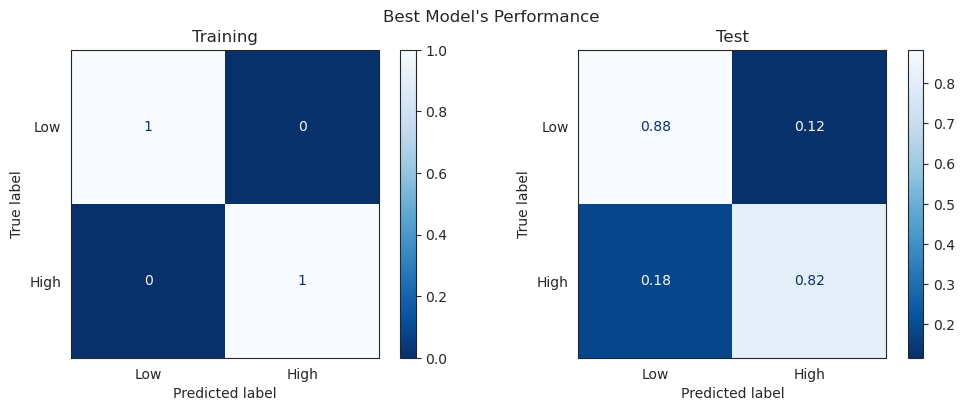

In [9]:
# confusion matrix of best model
cm_tr = confusion_matrix(y_tr, model_best.predict(X_tr), normalize="true")
ph_tr = ConfusionMatrixDisplay(cm_tr, display_labels=["Low", "High"])

cm_val = confusion_matrix(y_ts, model_best.predict(X_ts), normalize="true")
ph_val = ConfusionMatrixDisplay(cm_val, display_labels=["Low", "High"])

sns.set_style("white")
fig, axs = plt.subplots(1, 2, figsize=(12, 4))
ph_tr.plot(ax=axs[0], cmap="Blues_r")
axs[0].set_title("Training")
ph_val.plot(ax=axs[1], cmap="Blues_r")
axs[1].set_title("Test")
fig.suptitle("Best Model's Performance")


It is observed that the best trained decision tree classifier can classify samples of the California housing dataset with TPR values of 88% and 82% for Low and High classes respectively. To improve this, we can use ensemble models such as Random Forest or Gradient Boosting. 

## Regression

In [11]:
def visualize_hist(y, title, ax):
    sns.set_style("whitegrid")
    ax.hist(y, bins=np.linspace(y.min(), y.max(), 20))
    ax.set_xticks(np.arange(6))
    ax.set_xticklabels(np.linspace(y.min(), y.max(), 6))
    ax.set_xlabel("House Price")
    ax.set_ylabel("Count")
    ax.set_title(title)

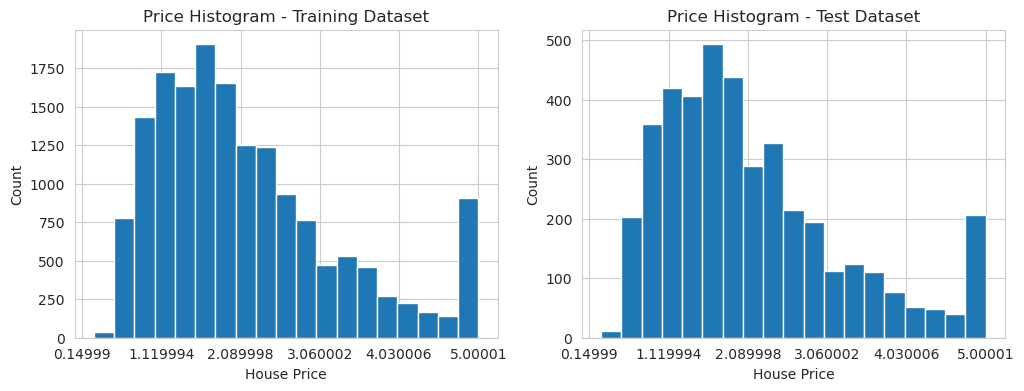

In [12]:
X_tr, y_tr = data_tr, targets_tr
X_ts, y_ts = data_ts, targets_ts

fig, axs = plt.subplots(1, 2, figsize=(12, 4))
visualize_hist(y_tr, title="Price Histogram - Training Dataset", ax=axs[0])
visualize_hist(y_ts, title="Price Histogram - Test Dataset", ax=axs[1])




Training with criterion=squared_error and max_depth=10 ...
Training with criterion=squared_error and max_depth=60 ...
Training with criterion=squared_error and max_depth=110 ...
Training with criterion=squared_error and max_depth=160 ...
Training with criterion=squared_error and max_depth=210 ...
Training with criterion=squared_error and max_depth=260 ...
Training with criterion=squared_error and max_depth=310 ...
Training with criterion=squared_error and max_depth=360 ...
Training with criterion=squared_error and max_depth=410 ...
Training with criterion=squared_error and max_depth=460 ...
Training with criterion=squared_error and max_depth=None ...


Training with criterion=friedman_mse and max_depth=10 ...
Training with criterion=friedman_mse and max_depth=60 ...
Training with criterion=friedman_mse and max_depth=110 ...
Training with criterion=friedman_mse and max_depth=160 ...
Training with criterion=friedman_mse and max_depth=210 ...
Training with criterion=friedman_mse and max

'Best model:'

DecisionTreeRegressor(criterion='poisson', max_depth=10)

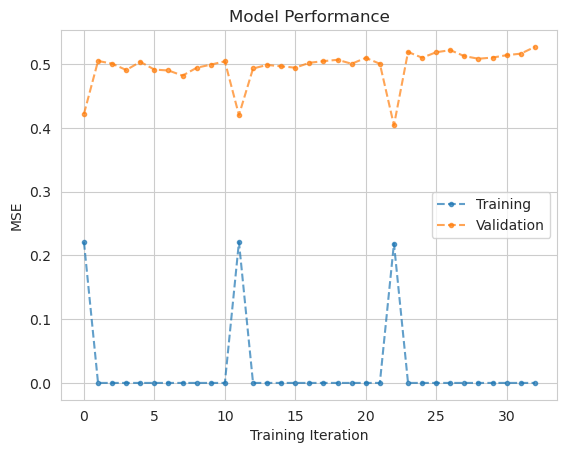

In [13]:
criteria = ["squared_error", "friedman_mse", "poisson"]
depth_vals = [*np.arange(10, 500, 50), None]
params_best = []
mse_best = 10
model_best = DummyRegressor()
mes_trs, mse_vals = [], []

for criterion in criteria:
    print("\n")
    for depth in depth_vals:
        print(f"Training with criterion={criterion} and max_depth={depth} ...")
        
        # Train
        model = DecisionTreeRegressor(criterion=criterion, max_depth=depth) 
        model.fit(X_tr, y_tr)
        
        # Log performance
        mes_trs.append(mean_squared_error(y_tr, model.predict(X_tr)))
        mse_vals.append(mean_squared_error(y_ts, model.predict(X_ts)))

        # Track best parameters
        if mse_vals[-1] < mse_best:
            params_best = [criterion, depth]
            mse_best = mse_vals[-1]
            model_best = model

print("\nBest parameters:", params_best)
print("Best MSE:", mse_best)
display("Best model:", model_best)
_ = visualize_performance(mes_trs, mse_vals, ylabel="MSE")

Similar to classification, we can observe that changing `criterion` and `max_depth` affects the performance of the model in terms of the obtained validation MSE: 
- The best validation performance is achieved by setting `criterion="poisson"` and `max_depth=10`. 
- This is a bit counter-intuitive, as we expect to have better performance using deeper trees. 
- To improve the obtained results, we can move towards ensemble methods using decision trees at their core (such as Random Forest, Adaptive Boosting, Bagging, Gradient Boosting, etc.) 